In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-05 12:50:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.47M   194MB/s    in 0.5s    

2022-05-05 12:50:41 (194 MB/s) - ‘pizza_steak.zip.4’ saved [109540975/109540975]



Image recognition with help of tensorflow


In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
ls pizza_steak

test/  train/


In [5]:
!ls pizza_steak/test/pizza/

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [6]:
import os
for dirpath, dirname, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirname)} directories and {len(filenames)}images in '(dirpath)'.")

There are 2 directories and 0images in '(dirpath)'.
There are 2 directories and 0images in '(dirpath)'.
There are 0 directories and 250images in '(dirpath)'.
There are 0 directories and 250images in '(dirpath)'.
There are 2 directories and 0images in '(dirpath)'.
There are 0 directories and 750images in '(dirpath)'.
There are 0 directories and 750images in '(dirpath)'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May  5 11:00 .
drwxr-xr-x 1 root root 4096 May  5 12:50 ..
drwxr-xr-x 4 root root 4096 May  5 11:00 test
drwxr-xr-x 4 root root 4096 May  5 11:00 train


In [8]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_image_train

750

In [9]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [10]:
print(class_names)

['pizza' 'steak']


In [11]:
#lets visualize images 
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  #get a random image 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") #show the shape of the image 

  return img 


['1404770.jpg']
image shape: (509, 512, 3)


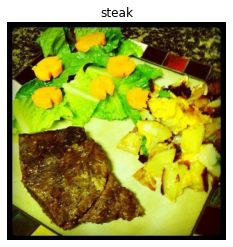

In [12]:
#view a rnadom image 

img = view_random_image(target_dir = "pizza_steak/train/",
                                     target_class="steak")


In [13]:
tf.constant(img)

<tf.Tensor: shape=(509, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)>

#building End to end CNN model 

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#set the seed 
tf.random.set_seed(42)

#preprocessed 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup dir
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode="binary",
                                                seed=42)

valid_data= valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size = 32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

#build CNN model 
model_1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters = 10,
                              kernel_size=3,
                              activation="relu",
                              input_shape=(224,224,3)),
      tf.keras.layers.Conv2D(10, 3, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding="valid"),
      tf.keras.layers.Conv2D(10, 3, activation="relu"),
      tf.keras.layers.Conv2D(10,3, activation="relu"),
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile model 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 225ms/step - loss: 0.5413 - accuracy: 0.7047 - val_loss: 0.3855 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4093 - accuracy: 0.8173 - val_loss: 0.3481 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3734 - accuracy: 0.8473 - val_loss: 0.3210 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3764 - accuracy: 0.8353 - val_loss: 0.3069 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3139 - accuracy: 0.8700 - val_loss: 0.3062 - val_accuracy: 0.8800


#slightly moderation in the model 
create a model to replicate the ensorflow playground model. 

In [15]:
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model 
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model

history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 0.9885 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


you can see the parameters difference in the above tabs. Now we are gonna increasing the hidden layers and increase the size of the filters

In [18]:
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model 
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model

history_3 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#Binary classification 
steps 
1. visualization
2. preprocessed
3. create a model(start with baseline)
4. Adjust different parameters

['1550997.jpg']
image shape: (512, 512, 3)
['2501636.jpg']
image shape: (512, 512, 3)


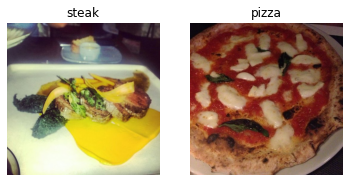

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [21]:
#preprocess the data 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
!nvidia-smi

Thu May  5 12:53:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
#load the data from directory 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next() #get next batch of images 
len(images), len(labels)

(32, 32)

In [26]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [29]:
#now create CNN model (start with baselie)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential 

In [30]:
model = Sequential([
        Conv2D(filters = 10,
        batch_size= 32,
        padding = 'valid',
        activation='relu',
        kernel_size=3,
        strides=1,
        input_shape=(224,224,3)),
        Conv2D(10,3,activation='relu'),
        Conv2D(10,3,activation='relu'),
        Flatten(),
        Dense(1, activation="sigmoid") 
])

In [31]:
#compile the model 
model.compile(loss = "binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 222, 222, 10)        280       
                                                                 
 conv2d_5 (Conv2D)           (32, 220, 220, 10)        910       
                                                                 
 conv2d_6 (Conv2D)           (32, 218, 218, 10)        910       
                                                                 
 flatten_3 (Flatten)         (32, 475240)              0         
                                                                 
 dense_8 (Dense)             (32, 1)                   475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [33]:
#fit the model
len(train_data),len(test_data)

(47, 16)

In [34]:
history = model.fit(train_data, 
                    epochs=5,
                    steps_per_epoch = len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
 8/47 [====>.........................] - ETA: 5s - loss: 1.1023 - accuracy: 0.5586

InvalidArgumentError: ignored

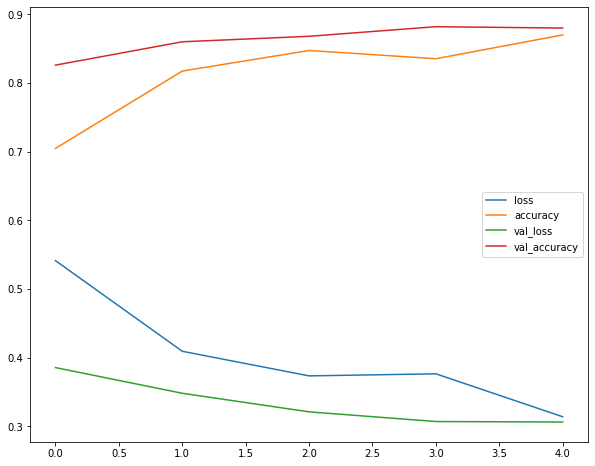

In [35]:
pd.DataFrame(history_1.history).plot(figsize=(10,8))